# Colab 1

In this Colab, we will write a full pipeline for **learning node embeddings**.
We will go through the following 3 steps.

To start, we will load a classic graph in network science, the [Karate Club Network](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). We will explore multiple graph statistics for that graph.

We will then work together to transform the graph structure into a PyTorch tensor, so that we can perform machine learning over the graph.

Finally, we will finish the first learning algorithm on graphs: a node embedding model. For simplicity, our model here is simpler than DeepWalk / node2vec algorithms taught in the lecture. But it's still rewarding and challenging, as we will write it from scratch via PyTorch.

Now let's get started!

**Note**: Make sure to **sequentially run all the cells**, so that the intermediate variables / packages will carry over to the next cell


<class 'networkx.classes.graph.Graph'>


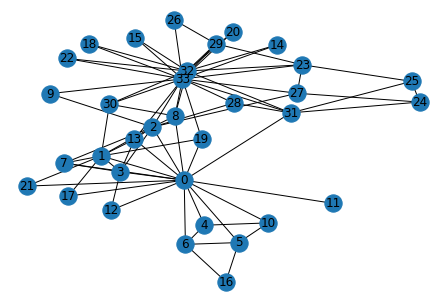

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

# G is an undirected graph
print(type(G))

# Visualize the graph
nx.draw(G, with_labels = True)
plt.show()

## Question 1: What is the average degree of the karate club network? (5 Points)

This one is easy just $\frac{\sum edges}{\sum nodes}$

In [4]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = num_edges / num_nodes

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 2.2941176470588234


## Question 2: What is the average clustering coefficient of the karate club network? (5 Points)

i.e. how many closed triples from a point.
$$ C_i = \frac{\sum_{i,j,k}A_{i}A_{j}A_{k}}{\sum_i{k_i(k_i-1)}} $$


$$ \overline{C} = \frac{1}{n}\sum_{i=1}^{n}C_i$$

In [7]:
import numpy as np

def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round 
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0

    # luckily networkx has this for us!
    c_i = nx.clustering(G)
    avg_cluster_coef = [v for k, v in c_i.items()]

    return np.mean(avg_cluster_coef)

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.5706384782076823


## Question 3: What is the PageRank value for node 0 (node with id 0) after one PageRank iteration? (5 Points)

Please complete the code block by implementing the PageRank equation: $r_j = \sum_{i \rightarrow j} \beta \frac{r_i}{d_i} + (1 - \beta) \frac{1}{N}$

In [32]:
M = nx.to_numpy_matrix(G)
M = np.divide(A, A.sum(axis=1)) #.sum(axis=1) yield all 1s

# modify M to include bounce probability
M = np.where(A==0, 1-beta, A*beta)
r0 = 1 / G.number_of_nodes()
r0 = r0 * np.ones(M.shape[0])
r = np.dot(M, r0)
r

array([0.48235294, 0.35882353, 0.37647059, 0.30588235, 0.25294118,
       0.27058824, 0.27058824, 0.27058824, 0.28823529, 0.23529412,
       0.25294118, 0.21764706, 0.23529412, 0.28823529, 0.23529412,
       0.23529412, 0.23529412, 0.23529412, 0.23529412, 0.25294118,
       0.23529412, 0.23529412, 0.23529412, 0.28823529, 0.25294118,
       0.25294118, 0.23529412, 0.27058824, 0.25294118, 0.27058824,
       0.27058824, 0.30588235, 0.41176471, 0.5       ])

In [34]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    # Normalized Adj matrix
    M = nx.to_numpy_matrix(G)
    M = np.divide(A, A.sum(axis=1)) #.sum(axis=1) yield all 1s
    
    # modify M to include bounce probability
    M = np.where(A==0, 1-beta, A*beta)
    
    r0 = r0 * np.ones(M.shape[0])
    r = np.dot(M, r0)

    ## 1: You should not use nx.pagerank
    r1 = r[node_id]
    
    
    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.4823529411764706


## Question 4: What is the (raw) closeness centrality for the karate club network node 5? (5 Points)

The equation for closeness centrality is $c(v) = \frac{1}{\sum_{u \neq v}\text{shortest path length between } u \text{ and } v}$

In [39]:
def closeness_centrality(G, node=5):
    # TODO: Implement the function that calculates closeness centrality 
    # for a node in karate club network. G is the input karate club 
    # network and node is the node id in the graph. Please round the 
    # closeness centrality result to 2 decimal places.

    closeness = 0

    ## Note:
    ## 1: You can use networkx closeness centrality function.
    ## 2: Notice that networkx closeness centrality returns the normalized 
    ## closeness directly, which is different from the raw (unnormalized) 
    ## one that we learned in the lecture.

    #########################################
    closeness = nx.closeness_centrality(G, u=node)

    return closeness

node = 0
closeness = closeness_centrality(G, node=node)
print("The karate club network node {} has closeness centrality {}".format(node, closeness))

The karate club network node 0 has closeness centrality 0.5689655172413793


# Transform to Tensor

In [40]:
import torch
print(torch.__version__)

1.7.1


In [41]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.1753, 0.2723, 0.0065, 0.1665],
        [0.4257, 0.3863, 0.4345, 0.2668],
        [0.7945, 0.7134, 0.7532, 0.3933]])
torch.Size([3, 4])


In [42]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


### Question 5: Getting the edge list of the karate club network and transform it into `torch.LongTensor`. What is the `torch.sum` value of `pos_edge_index` tensor? (10 Points)

In [112]:
def graph_to_edge_list(G):
    # TODO: Implement the function that returns the edge list of
    # an nx.Graph. The returned edge_list should be a list of tuples
    # where each tuple is a tuple representing an edge connected 
    # by two nodes.

    ############# Your code here ############

    #########################################

    return list(G.edges)

def edge_list_to_tensor(edge_list):
    # TODO: Implement the function that transforms the edge_list to
    # tensor. The input edge_list is a list of tuples and the resulting
    # tensor should have the shape [2 x len(edge_list)].

    edge_index = torch.tensor(edge_list)

    ############# Your code here ############

    #########################################

    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([78, 2])
The pos_edge_index tensor has sum value 2535


## Question 6: Please implement following function that samples negative edges. Then you will answer which edges (edge_1 to edge_5) can be negative ones in the karate club network? (10 Points)

In [110]:
import random

def sample_negative_edges(G, num_neg_samples):
    # TODO: Implement the function that returns a list of negative edges.
    # The number of sampled negative edges is num_neg_samples. You do not
    # need to consider the corner case when the number of possible negative edges
    # is less than num_neg_samples. It should be ok as long as your implementation 
    # works on the karate club network. In this implementation, self loop should 
    # not be considered as either a positive or negative edge. Also, notice that 
    # the karate club network is an undirected graph, if (0, 1) is a positive 
    # edge, do you think (1, 0) can be a negative one?

    neg_edge_list = []

    ############# Your code here ############
    for n in range(num_neg_samples):
        while True:
            i = np.random.choice(len(G.nodes))
            j = np.random.choice(len(G.nodes))
            if i!=j and not G.has_edge(i, 1j):
                neg_edge_list.append((i,j))
                break
    #########################################

    return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge

#########################################
print(G.has_edge(edge_1[0], edge_1[1]))
print(G.has_edge(edge_2[0], edge_2[1]))
print(G.has_edge(edge_3[0], edge_3[1]))
print(G.has_edge(edge_4[0], edge_4[1]))
print(G.has_edge(edge_5[0], edge_5[1]))

The neg_edge_index tensor has shape torch.Size([78, 2])
True
False
True
True
False


# 3 Node Emebedding Learning

Finally, we will finish the first learning algorithm on graphs: a node embedding model.

In [156]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.7.1


In [157]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [158]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[ 0.0101,  0.8362,  1.2051, -0.0683, -0.4875, -0.4971,  1.4690,  0.0375]],
       grad_fn=<EmbeddingBackward>)
tensor([[ 0.0101,  0.8362,  1.2051, -0.0683, -0.4875, -0.4971,  1.4690,  0.0375],
        [ 0.6357, -0.7775, -0.0557, -0.0443,  2.0859,  0.1051,  0.0199, -0.6802]],
       grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


Now, it's your time to create node embedding matrix for the graph we have!
- We want to have **16 dimensional** vector for each node in the karate club network.
- We want to initalize the matrix under **uniform distribution**, in the range of $[0, 1)$. We suggest you using [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html).

In [199]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    # TODO: Implement this function that will create the node embedding matrix.
    # A torch.nn.Embedding layer will be returned. You do not need to change 
    # the values of num_node and embedding_dim. The weight matrix of returned 
    # layer should be initialized under uniform distribution. 

    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    nn.init.uniform_(emb.weight, 0.0, 1.0)

  ############# Your code here ############

  #########################################

    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


## Visualize the initial node embeddings
One good way to understand an embedding matrix, is to visualize it in a 2D space.
Here, we have implemented an embedding visualization function for you.
We first do PCA to reduce the dimensionality of embeddings to a 2D space.
Then visualize each point, colored by the community it belongs to.

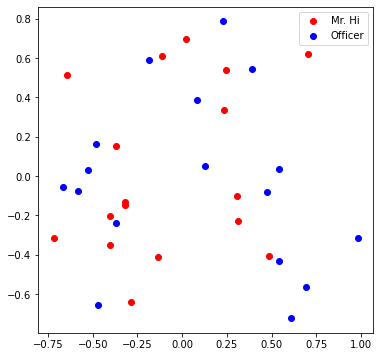

In [200]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        if node[1]['club'] == 'Mr. Hi':
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color="blue", label="Officer")
    plt.legend()
    plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

# Question 7: Training the embedding! What is the best performance you can get? Please report both the best loss and accuracy on Gradescope. (20 Points

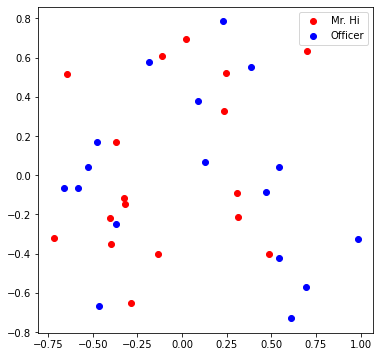

loss: 1.9969571828842163, accuracy: 0.5
loss: 1.5191669464111328, accuracy: 0.5
loss: 0.9463372826576233, accuracy: 0.5
loss: 0.6751264333724976, accuracy: 0.5641
loss: 0.5718485116958618, accuracy: 0.6731
loss: 0.5205696821212769, accuracy: 0.7821
loss: 0.4841787815093994, accuracy: 0.8333
loss: 0.452913761138916, accuracy: 0.8526
loss: 0.42412278056144714, accuracy: 0.859
loss: 0.39697256684303284, accuracy: 0.8718


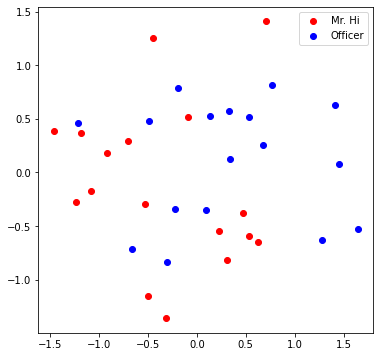

loss: 0.3711707890033722, accuracy: 0.8974
loss: 0.3466523587703705, accuracy: 0.9038
loss: 0.323475182056427, accuracy: 0.9167
loss: 0.3017546832561493, accuracy: 0.9359
loss: 0.28161054849624634, accuracy: 0.9359
loss: 0.2631285786628723, accuracy: 0.9423
loss: 0.24634036421775818, accuracy: 0.9423
loss: 0.23121948540210724, accuracy: 0.9423
loss: 0.21769091486930847, accuracy: 0.9423
loss: 0.20564579963684082, accuracy: 0.9423


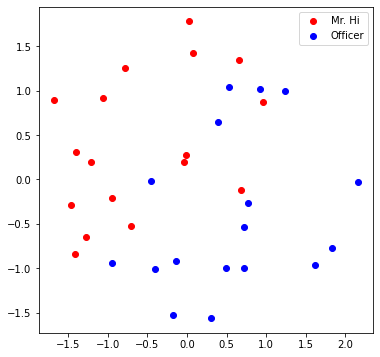

loss: 0.19495682418346405, accuracy: 0.9423
loss: 0.18549005687236786, accuracy: 0.9423
loss: 0.17711316049098969, accuracy: 0.9423
loss: 0.16970057785511017, accuracy: 0.9423
loss: 0.163136288523674, accuracy: 0.9423
loss: 0.15731535851955414, accuracy: 0.9423
loss: 0.15214423835277557, accuracy: 0.9423
loss: 0.1475403755903244, accuracy: 0.9423
loss: 0.14343151450157166, accuracy: 0.9423
loss: 0.13975487649440765, accuracy: 0.9423


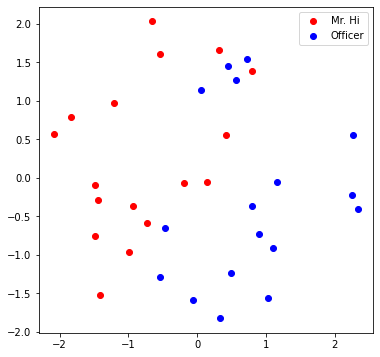

loss: 0.13645590841770172, accuracy: 0.9423
loss: 0.1334875077009201, accuracy: 0.9423
loss: 0.13080894947052002, accuracy: 0.9423
loss: 0.12838511168956757, accuracy: 0.9423
loss: 0.12618553638458252, accuracy: 0.9423
loss: 0.12418404966592789, accuracy: 0.9423
loss: 0.12235786020755768, accuracy: 0.9423
loss: 0.12068731337785721, accuracy: 0.9423
loss: 0.11915519833564758, accuracy: 0.9423
loss: 0.11774664372205734, accuracy: 0.9423


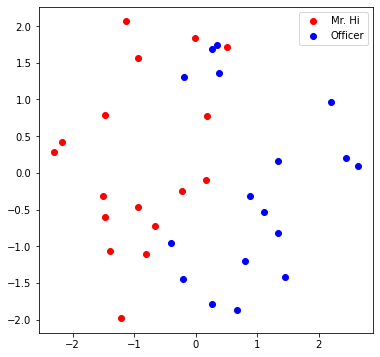

loss: 0.11644861102104187, accuracy: 0.9423
loss: 0.11524973064661026, accuracy: 0.9423
loss: 0.11414001137018204, accuracy: 0.9423
loss: 0.11311065405607224, accuracy: 0.9423
loss: 0.11215389519929886, accuracy: 0.9423
loss: 0.1112629696726799, accuracy: 0.9423
loss: 0.1104317456483841, accuracy: 0.9423
loss: 0.10965488851070404, accuracy: 0.9423
loss: 0.10892761498689651, accuracy: 0.9423
loss: 0.1082456186413765, accuracy: 0.9423


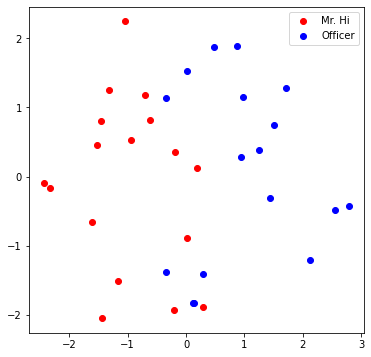

loss: 0.10760511457920074, accuracy: 0.9423
loss: 0.10700265318155289, accuracy: 0.9423
loss: 0.10643517971038818, accuracy: 0.9423
loss: 0.10589990764856339, accuracy: 0.9423
loss: 0.1053943783044815, accuracy: 0.9423
loss: 0.1049162894487381, accuracy: 0.9423
loss: 0.10446363687515259, accuracy: 0.9423
loss: 0.10403453558683395, accuracy: 0.9423
loss: 0.10362731665372849, accuracy: 0.9423
loss: 0.10324041545391083, accuracy: 0.9423


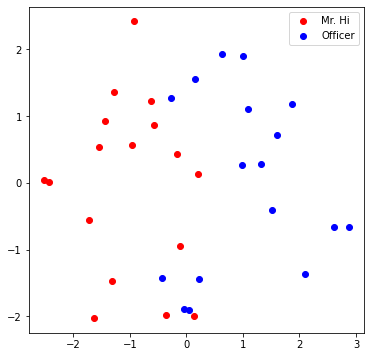

loss: 0.10287248343229294, accuracy: 0.9423
loss: 0.10252220183610916, accuracy: 0.9423
loss: 0.10218841582536697, accuracy: 0.9423
loss: 0.10187004506587982, accuracy: 0.9423
loss: 0.10156611353158951, accuracy: 0.9423
loss: 0.10127569735050201, accuracy: 0.9423
loss: 0.10099796950817108, accuracy: 0.9423
loss: 0.10073217004537582, accuracy: 0.9423
loss: 0.10047757625579834, accuracy: 0.9423
loss: 0.1002335250377655, accuracy: 0.9423


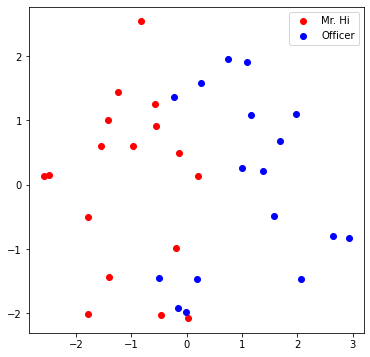

loss: 0.09999941289424896, accuracy: 0.9423
loss: 0.09977468103170395, accuracy: 0.9423
loss: 0.09955880045890808, accuracy: 0.9423
loss: 0.09935129433870316, accuracy: 0.9423
loss: 0.09915170073509216, accuracy: 0.9423
loss: 0.09895960241556168, accuracy: 0.9423
loss: 0.09877458959817886, accuracy: 0.9423
loss: 0.09859631210565567, accuracy: 0.9423
loss: 0.09842441231012344, accuracy: 0.9423
loss: 0.0982585921883583, accuracy: 0.9423


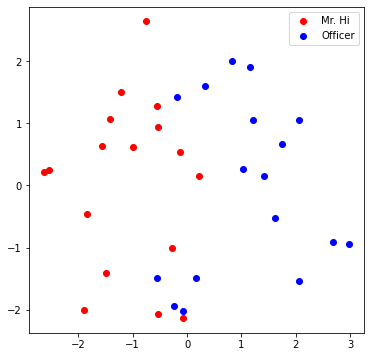

loss: 0.09809853136539459, accuracy: 0.9423
loss: 0.09794396162033081, accuracy: 0.9423
loss: 0.09779461473226547, accuracy: 0.9423
loss: 0.09765022993087769, accuracy: 0.9423
loss: 0.09751059114933014, accuracy: 0.9423
loss: 0.09737546741962433, accuracy: 0.9423
loss: 0.09724467247724533, accuracy: 0.9423
loss: 0.09711798280477524, accuracy: 0.9423
loss: 0.09699524194002151, accuracy: 0.9423
loss: 0.09687626361846924, accuracy: 0.9423


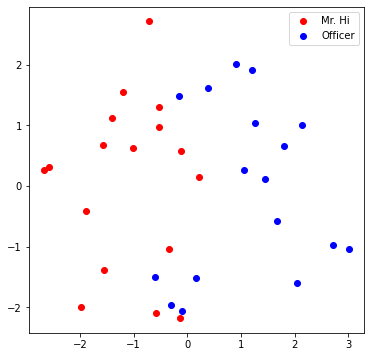

loss: 0.09676090627908707, accuracy: 0.9423
loss: 0.09664898365736008, accuracy: 0.9423
loss: 0.09654035419225693, accuracy: 0.9423
loss: 0.09643489122390747, accuracy: 0.9423
loss: 0.09633248299360275, accuracy: 0.9423
loss: 0.09623296558856964, accuracy: 0.9423
loss: 0.09613624960184097, accuracy: 0.9423
loss: 0.09604223072528839, accuracy: 0.9423
loss: 0.09595077484846115, accuracy: 0.9423
loss: 0.09586180001497269, accuracy: 0.9423


In [201]:
from torch.optim import SGD

def accuracy(pred, label):
    # TODO: Implement the accuracy function. This function takes the 
    # pred tensor (the resulting tensor after sigmoid) and the label 
    # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
    # be classified as label 1. Else it will be classified as label 0.
    # The returned accuracy should be rounded to 4 decimal places. 
    # For example, accuracy 0.82956 will be rounded to 0.8296.

    pred_label = pred.ge(0.5) 
    accu = torch.sum(pred_label == label) / label.shape[0]
    accu = accu.item()

    return round(accu,4)

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    # TODO: Train the embedding layer here. You can also change epochs and 
    # learning rate. In general, you need to implement: 
    # (1) Get the embeddings of the nodes in train_edge
    # (2) Dot product the embeddings between each node pair
    # (3) Feed the dot product result into sigmoid
    # (4) Feed the sigmoid output into the loss_fn
    # (5) Print both loss and accuracy of each epoch 
    # (as a sanity check, the loss should decrease during training)

    epochs = 1000
    learning_rate = 0.1

    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
    criterion = loss_fn

    for i in range(epochs):
        optimizer.zero_grad()  # Clear gradients.
        
        # TODO
        # out = torch.sum(emb(train_edge) * emb(train_edge), dim=-1)
        out = torch.sum(torch.mul(emb(train_edge[0]),emb(train_edge[1])), axis = 1)
        out = sigmoid(out)
        
        loss = criterion(out, train_label)  # Compute the loss solely based on the training nodes.
        loss.backward()  # Derive gradients.
        
        # DONE
        optimizer.step()
        
        with torch.no_grad():
            accu = accuracy(out, train_label)
            if i % 100 == 0:
                visualize_emb(emb)
            if i % 10 == 0:
                print("loss: {}, accuracy: {}".format(loss.item(), accu))
            

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[0], )
neg_label = torch.zeros(neg_edge_index.shape[0], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0) # 78
#train_label = train_label.expand(78, -1)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([torch.transpose(pos_edge_index, 0, 1), torch.transpose(neg_edge_index, 0, 1)], dim=1)

train(emb, loss_fn, sigmoid, train_label, train_edge)

In [197]:
torch.transpose(pos_edge_index, 0, 1)

torch.Size([2, 78])

In [178]:
out = torch.sum(emb(train_edge) * emb(train_edge), dim=-1)
out = sigmoid(out)
out

tensor([[0.8889, 0.6000, 0.5073, 0.5190],
        [0.8889, 0.6250, 0.6250, 0.5000],
        [0.8889, 0.6667, 0.5000, 0.6667],
        [0.8889, 0.5000, 0.5000, 0.5001],
        [0.8889, 0.5001, 0.5000, 0.5000],
        [0.8889, 0.5092, 0.5001, 0.5000],
        [0.8889, 0.6667, 0.6000, 0.5000],
        [0.8889, 0.5073, 0.5000, 0.7500],
        [0.8889, 0.5000, 0.6667, 0.5001],
        [0.8889, 0.5000, 0.5000, 0.5001],
        [0.8889, 0.5190, 0.5000, 0.6250],
        [0.8889, 0.5000, 0.5001, 0.5455],
        [0.8889, 0.6671, 0.5000, 0.5000],
        [0.8889, 0.5000, 0.5000, 0.5000],
        [0.8889, 0.5001, 0.5000, 0.5001],
        [0.8889, 0.5455, 0.5000, 0.5000],
        [0.6000, 0.6250, 0.5000, 0.5001],
        [0.6000, 0.6667, 0.5000, 0.5073],
        [0.6000, 0.6667, 0.5000, 0.5000],
        [0.6000, 0.5000, 0.5000, 0.7500],
        [0.6000, 0.6671, 0.6250, 0.5092],
        [0.6000, 0.5000, 0.5000, 0.5000],
        [0.6000, 0.5001, 0.5001, 0.5000],
        [0.6000, 0.5001, 0.5455, 0

In [179]:
torch.sum(torch.mul(emb(train_edge[0]),emb(train_edge[1])), axis = 1)

tensor([2.0794, 0.3540, 0.0808, 0.0026], grad_fn=<SumBackward1>)

In [180]:
torch.mul(emb(train_edge[0]),emb(train_edge[1]))

tensor([[2.0051e-02, 2.4149e-01, 9.2175e-03, 4.1771e-01, 3.8621e-02, 2.8378e-01,
         1.1999e-01, 3.5216e-02, 3.1212e-01, 6.3011e-03, 2.4885e-02, 1.4072e-01,
         3.6086e-01, 3.6656e-02, 1.7161e-02, 1.4671e-02],
        [1.6065e-02, 1.3095e-02, 2.7082e-02, 7.4205e-03, 5.8694e-02, 3.1971e-02,
         6.1912e-03, 2.0921e-02, 3.9229e-02, 8.1452e-03, 1.9531e-02, 3.5599e-02,
         7.1341e-03, 1.1959e-02, 1.6820e-02, 3.4121e-02],
        [4.6642e-04, 5.2319e-03, 7.2924e-03, 5.1692e-03, 4.8471e-03, 2.0017e-03,
         6.6261e-03, 5.5823e-03, 1.2166e-02, 3.3011e-03, 7.5861e-04, 4.9892e-03,
         9.2858e-03, 5.7888e-04, 6.8656e-03, 5.6403e-03],
        [2.9978e-04, 5.8575e-05, 2.1003e-04, 1.2620e-04, 2.9278e-05, 4.5459e-05,
         1.4257e-04, 1.2550e-04, 1.7875e-05, 2.6796e-04, 1.2574e-05, 3.8693e-04,
         2.2777e-04, 7.2581e-06, 2.7727e-04, 3.6646e-04]],
       grad_fn=<MulBackward0>)

In [182]:
emb(train_edge[0]).shape

torch.Size([4, 16])